<a href="https://colab.research.google.com/github/Smasko7/Machine-Learning-Course/blob/main/First_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###1. Load Dataset

In [ ]:
Dataset = pd.DataFrame(pd.read_csv('diabetes.csv'))
Dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
Dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


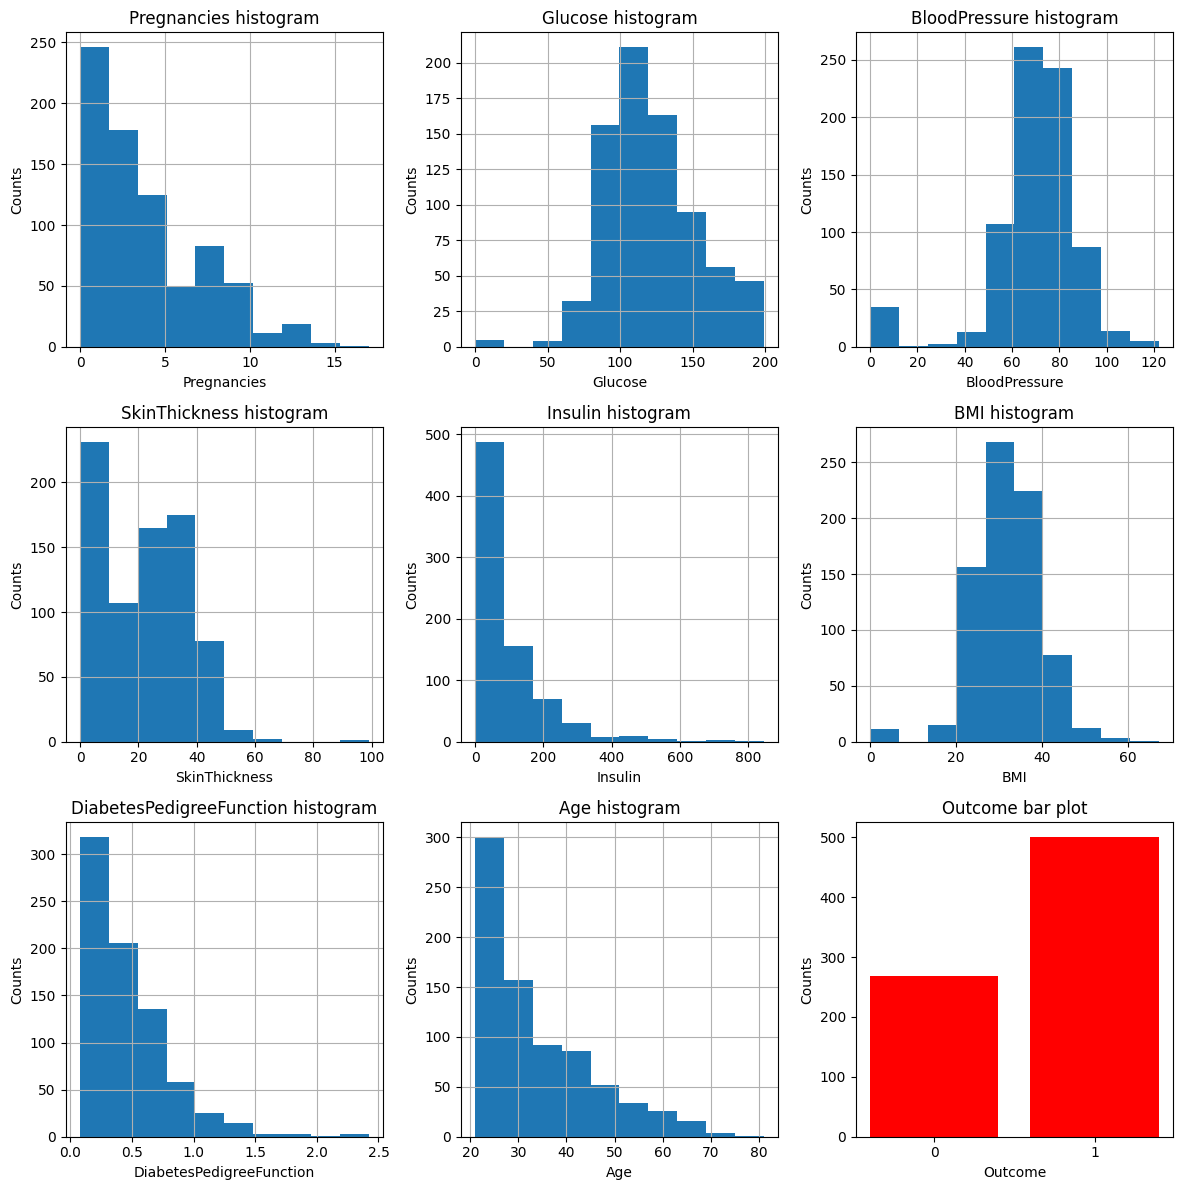

In [ ]:
N_samples = Dataset.shape[0]
N_features = Dataset.shape[1]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()


for (i, feature) in enumerate(Dataset.columns):
  if feature == "Outcome":
    break
  Dataset[feature].hist(ax=axes[i])
  axes[i].set_title(feature + " histogram")
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Counts')


plt.bar(Dataset['Outcome'].unique(), Dataset['Outcome'].value_counts(), color = 'red')
plt.xticks(Dataset['Outcome'].unique())
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.title(feature + " bar plot")

plt.tight_layout()
plt.show()

2. The data quality is not that good, because the scale is not the same for all features. Thus, normalization is necessary here. Also, there are far more outcomes labeled as 1 than 0. Furthermore, the distributions of some features seem to be really similar, which may indicate some collinearity issues.

3. Age feature follows exponential distribution. This means that the observations with young ages are significantly more than those of the older ages. This is not ideal for our model, because we would prefer a more representative dataset for all ages.

4. The plots below show the distribution of the glucose according to the outcome. The patients with diabetes seem to have increased glucose levels. However, we cannot be sure if glucose is the strongest indicator for diabetes judging only from the dataset.

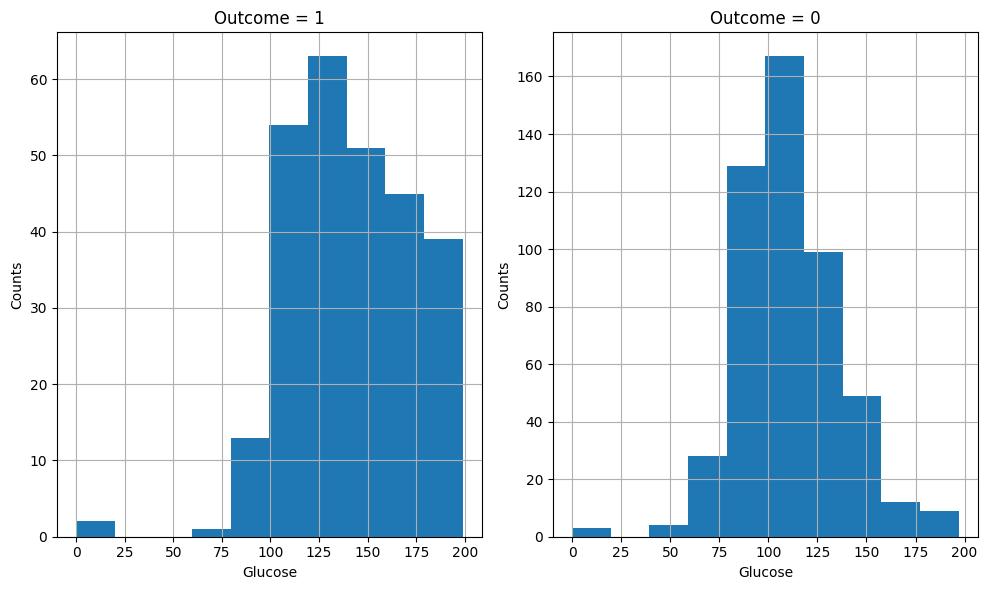

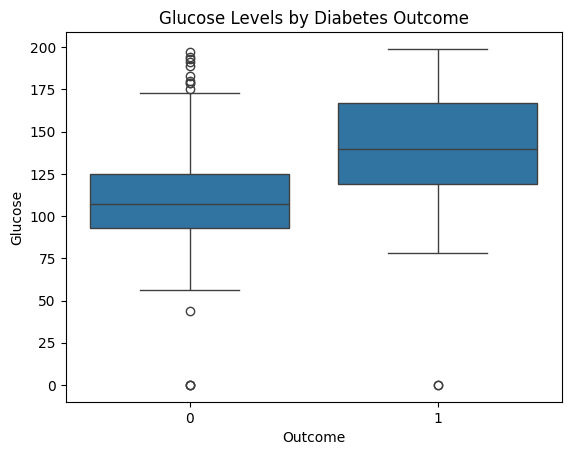

,Glucose
Outcome,
0,"Axes(0.125,0.11;0.775x0.77)"
1,"Axes(0.125,0.11;0.775x0.77)"


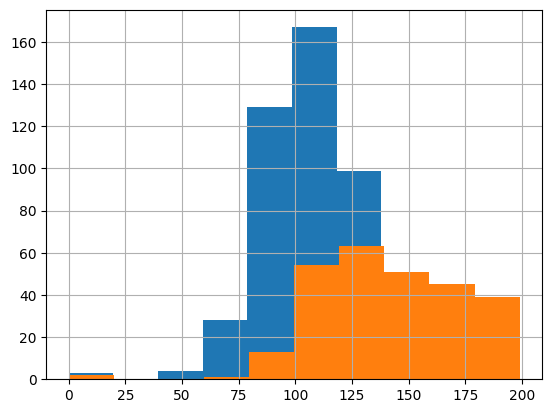

In [ ]:
Dataset.loc[Dataset['Outcome']==1, 'Glucose']

fig, ax = plt.subplots(1,2,figsize=(10, 6))
axes = ax.flatten()

Dataset.loc[Dataset['Outcome']==1, 'Glucose'].hist(ax=axes[0])
axes[0].set_title("Outcome = 1")
axes[0].set_xlabel("Glucose")
axes[0].set_ylabel('Counts')

Dataset.loc[Dataset['Outcome']==0, 'Glucose'].hist(ax=axes[1])
axes[1].set_title("Outcome = 0")
axes[1].set_xlabel("Glucose")
axes[1].set_ylabel('Counts')

plt.tight_layout()
plt.show()

# plot = plt.scatter(Dataset['Glucose'], Dataset['Outcome'])

sns.boxplot(x='Outcome', y='Glucose', data=Dataset)
plt.title('Glucose Levels by Diabetes Outcome')
plt.show()

#Dataset.groupby('Outcome')['Glucose'].hist()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = Dataset.loc[:, Dataset.columns != 'Outcome'].to_numpy()
y = Dataset['Outcome'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)

print(f"With 70-30 split, we get {X_train.shape[0]} train samples and {X_test.shape[0]} samples")


With 70-30 split, we get 537 train samples and 231 samples


In [ ]:
# from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=0, max_iter=1000)
model.fit(X_train, y_train)
Test_accuracy = model.score(X_test, y_test)
Train_accuracy = model.score(X_train, y_train)

print(f"Train accuracy: {Train_accuracy}")
print(f"Test accuracy: {Test_accuracy}")


Train accuracy: 0.7653631284916201
Test accuracy: 0.7792207792207793


We observe that accuracies on test and train datasets are similar, with test accuracy being slightly higher. This means that overfitting is avoided, as the model is able to generize from the known, training dataset, to uknown test data.

Test accuracy of the model for age under 25: 0.8378378378378378
Test accuracy of the model for age between 25 and 50: 0.7293233082706767
Test accuracy of the model for age over 50: 0.875


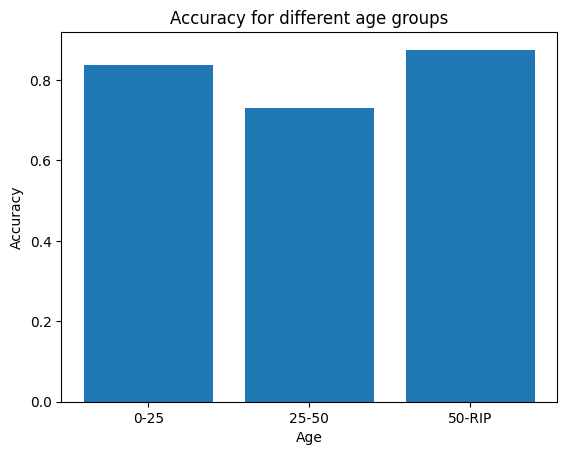

In [ ]:
Age_under_25_idx = X_test[:, 7] < 25
Age_25_50_idx = (X_test[:, 7] >= 25) & (X_test[:, 7] < 50)
Age_over_50_idx = X_test[:, 7] >= 50

x_test_age_under_25 = X_test[Age_under_25_idx]
x_test_age_25_50 = X_test[Age_25_50_idx]
x_test_age_over_50 = X_test[Age_over_50_idx]

y_test_age_under_25 = y_test[Age_under_25_idx]
y_test_age_25_50 = y_test[Age_25_50_idx]
y_test_age_over_50 = y_test[Age_over_50_idx]


Test_accuracy_under_25 = model.score(x_test_age_under_25, y_test_age_under_25)
Test_accuracy_25_50 = model.score(x_test_age_25_50, y_test_age_25_50)
Test_accuracy_over_50 = model.score(x_test_age_over_50, y_test_age_over_50)

print(f"Test accuracy of the model for age under 25: {Test_accuracy_under_25}")
print(f"Test accuracy of the model for age between 25 and 50: {Test_accuracy_25_50}")
print(f"Test accuracy of the model for age over 50: {Test_accuracy_over_50}")

Accuracies_age = [Test_accuracy_under_25, Test_accuracy_25_50, Test_accuracy_over_50]

plt.bar(["0-25", "25-50", "50-RIP"], Accuracies_age)
plt.xlabel("Age")
plt.ylabel("Accuracy")
plt.title("Accuracy for different age groups")
plt.show()

7. From the above bar plot we can conclude that our model behaves significantly better for lower ages. This is because the age distribution was exponential, meaning that there were far more training samples available for the early ages. Thus, the model was trained better for those ages.

8. In this problem, it is worse for the model to predict that a person with diabetes does not have diabetes, than predict that a person without diabetes has the disease, because it is vital to accurately spot all the patients with diabetes. Thus, we are intrested more in sensitivity (recall), rather than precision.

In [ ]:
# x = Dataset.loc[:, Dataset.columns != 'Outcome'].to_numpy()
# y = Dataset['Outcome'].to_numpy()

train_accuracies = np.zeros(10)
test_accuracies = np.zeros(10)

for i in range(10):
  print("===============================")
  print(f"SEED = {i}")
  print("===============================")

  X_train, X_test, y_train, y_test = train_test_split(
      x, y, test_size=0.3, random_state=i)

  print(f"With 70-30 split, we get {X_train.shape[0]} train samples and {X_test.shape[0]} samples")

  model = LogisticRegression(random_state=i, max_iter=1000)
  model.fit(X_train, y_train)
  Test_accuracy = model.score(X_test, y_test)
  Train_accuracy = model.score(X_train, y_train)

  print(f"Train accuracy: {Train_accuracy}")
  print(f"Test accuracy: {Test_accuracy}")

  train_accuracies[i] = Train_accuracy
  test_accuracies[i] = Test_accuracy

print("\n===============================")
print("Aggregate metrics")
print("===============================")

print(f"Average train accuracy: {np.mean(train_accuracies)}")
print(f"Average test accuracy: {np.mean(test_accuracies)}")
print(f"Train Standard deviation: {np.std(train_accuracies)}")
print(f"Test Standard deviation: {np.std(test_accuracies)}")


SEED = 0
With 70-30 split, we get 537 train samples and 231 samples
Train accuracy: 0.7653631284916201
Test accuracy: 0.7792207792207793
SEED = 1
With 70-30 split, we get 537 train samples and 231 samples
Train accuracy: 0.7728119180633147
Test accuracy: 0.7835497835497836
SEED = 2
With 70-30 split, we get 537 train samples and 231 samples
Train accuracy: 0.7858472998137802
Test accuracy: 0.7489177489177489
SEED = 3
With 70-30 split, we get 537 train samples and 231 samples
Train accuracy: 0.7877094972067039
Test accuracy: 0.7532467532467533
SEED = 4
With 70-30 split, we get 537 train samples and 231 samples
Train accuracy: 0.7597765363128491
Test accuracy: 0.8095238095238095
SEED = 5
With 70-30 split, we get 537 train samples and 231 samples
Train accuracy: 0.7635009310986964
Test accuracy: 0.7835497835497836
SEED = 6
With 70-30 split, we get 537 train samples and 231 samples
Train accuracy: 0.7690875232774674
Test accuracy: 0.7662337662337663
SEED = 7
With 70-30 split, we get 537 tra

Test accuracy of the scaled model is: 0.7359307359307359
[[ 1.32031677  4.70762101 -0.69733401  0.20522082 -0.12516372  3.17753922
   1.38572614  1.12210855]]
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93  

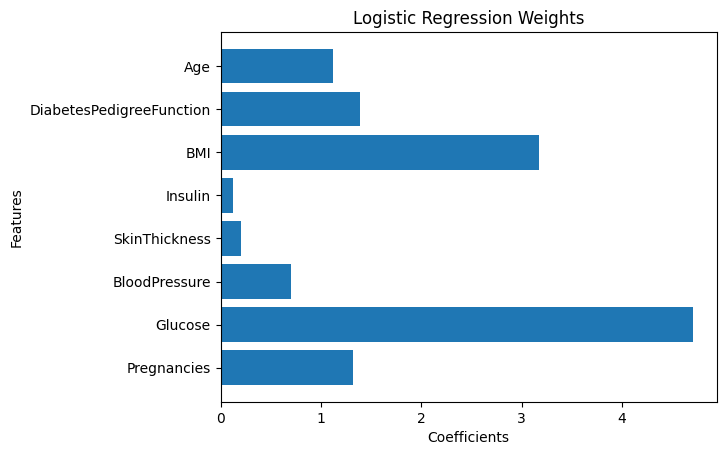

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

model2 = LogisticRegression(random_state=0, max_iter=1000)
model2.fit(x_train_scaled, y_train)

Test_accuracy_scaled_model = model2.score(x_test_scaled, y_test)

print(f"Test accuracy of the scaled model is: {Test_accuracy_scaled_model}")

print(model2.coef_)

features = Dataset.loc[:, Dataset.columns != 'Outcome']
print(features)

coeffs = model2.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(features.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()

10. From the bar chart above, we conclude that the feature with the strongest predictive value is glucose, followed by the BMI and Pedigree Function. This confirms the initial hypothesis that glucose is the strongest indicator among all features.

#PART 2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = Dataset[['Pregnancies', 'BloodPressure', 'BMI', 'Age']].values
y = Dataset['Insulin'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f"Training examples: {len(X_train)}")
print(f"Validation examples: {len(X_test)}")

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Training examples: 537
Validation examples: 231
Mean Squared Error (MSE): 10883.73731967615
Mean Absolute Error (MAE): 79.82886812357145
